# Parallel Processing using Multi-GPU Configurations
Link: https://docs.nvidia.com/deeplearning/modulus/text/features/parallel_training.html?highlight=srun

I usually run Nvidia modulus on multiple GPUs by adding ` --gres=gpu:2` parameter using `salloc` to see the training output on screen. 

```sh
[s.1915438@sl2 ~]$ salloc --nodes=1 --account=scw1901 --partition=accel_ai --gres=gpu:2
salloc: Granted job allocation 7164260
salloc: Waiting for resource configuration
salloc: Nodes scs2042 are ready for job
[s.1915438@sl2 ~]$ cd /scratch/s.1915438
[s.1915438@sl2 s.1915438]$ source env/modulus/bin/activate
[s.1915438@sl2 s.1915438]$ srun python Modulus_examples/examples/ldc/ldc_2d.py
```

I assumed that Nvidia modulus automatically uses both the GPUs. Recently, I realised that Nivida Modulus recommends either of these commands.

* `mpirun -np 2 python fpga_flow.py`, here I tried loading the openmpi module, it says `bash: mpirun: command not found`.  
* `srun -n 16 --ntasks-per-node 8 --mpi=none python fpga_flow.py`, I modified this command as follows:

`srun --nodes=1 --account=scw1901 --partition=accel_ai --gres=gpu:2 --mpi=none python wave_inverse.py`, this command does work and starts the training instantly.

```python
(modulus) srun --nodes=1 --account=scw1901 --partition=accel_ai --gres=gpu:2 --mpi=none python spring_mass_solver.py 
training:
  max_steps: 10000
  grad_agg_freq: 1
  rec_results_freq: 1000
  rec_validation_freq: ${training.rec_results_freq}
  rec_inference_freq: ${training.rec_results_freq}
  rec_monitor_freq: ${training.rec_results_freq}
  rec_constraint_freq: ${training.rec_...
```

I am not sure if it is using multiple GPUs. The problem is `srun nvidia-smi` prints all the GPUs on that particular node no matter how many GPUs you were allocated. I have no idea what `--mpi=none` is.

I will continue to use the command.

`srun --nodes=1 --account=scw1901 --partition=accel_ai --gres=gpu:2 --mpi=none python spring_mass_solver.py `

Also, if I allocate a job in a port forwarded Jupyter server inside the Nvidia Modulus's python virtual environment then I do not need to activate the python virtual environment every single time.

## A short summary
* Create a job in a port forwarded Jupyter server inside the Nvidia Modulus's python virtual environment on login node.

`ssh -L 8888:localhost:8888 -t s.1915438@sunbird.swansea.ac.uk "cd /scratch/s.1915438/;source env/modulus/bin/activate;jupyter-lab"`

* Open the Jupyter server and train multiple models in multiple terminals using 

`srun --nodes=1 --account=scw1901 --partition=accel_ai --gres=gpu:2 --mpi=none python <filename>`

```python
(modulus) srun --nodes=1 --account=scw1901 --partition=accel_ai --gres=gpu:2 --mpi=none python spring_mass_solver.py 
training:
  max_steps: 10000
  grad_agg_freq: 1
  rec_results_freq: 1000
  rec_validation_freq:...
```

The figure shows 3 models training simultaneously with 2 GPUs each.

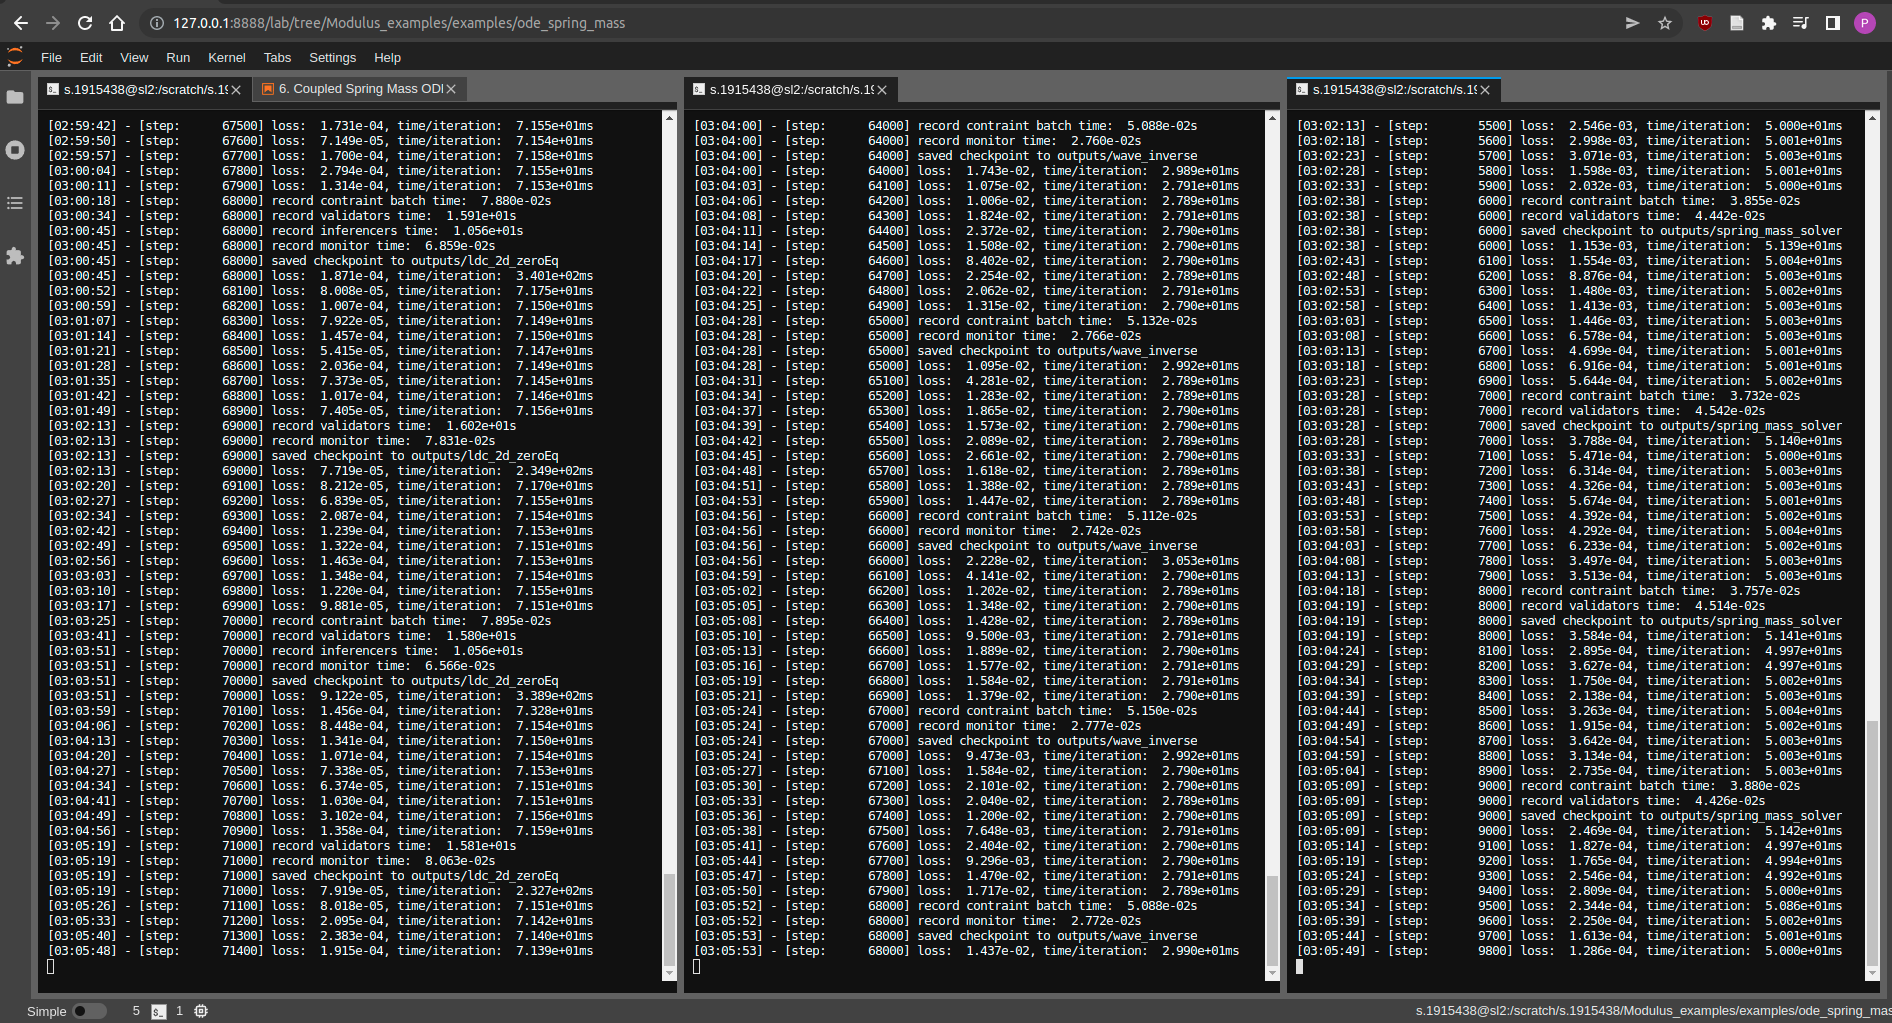